In [2]:
import pandas as pd
import seaborn as sns
import statistics
import category_encoders as ce

In [3]:
data = pd.read_csv('/Users/artemmoskvin/Documents/Data-Science/Data/wine_cleared.csv')

In [4]:
data['price_round'] = data['price'].round().astype(int)

In [5]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

In [6]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)

In [7]:
data['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [8]:
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [9]:
data['is_france'].sum()

22093

In [10]:
data['is_italy'].sum()

19540

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  price_round            129971 non-null  int64  
 14  year                   125362 non-nu

In [12]:
data['year'] = pd.to_datetime(data['year'], errors = 'coerce')
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013-01-01,1,0,0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013-01-01,1,0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012-01-01,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013-01-01,0,0,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,2004-01-01,1,0,0
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013-01-01,0,1,0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012-01-01,0,1,0


In [13]:
data['year'] = data['year'].dt.year

In [14]:
data['old_wine'] = data['year'].apply(lambda x: 1 if x < 2010 else 0)

In [15]:
data['old_wine'].sum()

39765

In [16]:
regex = '\((.*?)\)'
data['locality'] = data['title'].str.findall(regex).str.get(0)

In [17]:
data['year'] = pd.to_datetime(data['year'], yearfirst = True)
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,1970-01-01 00:00:00.000002013,0,0,1,0,Etna
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,1970-01-01 00:00:00.000002011,0,0,0,0,Douro
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,1970-01-01 00:00:00.000002013,1,0,0,0,Willamette Valley
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,1970-01-01 00:00:00.000002013,1,0,0,0,Lake Michigan Shore
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,1970-01-01 00:00:00.000002012,1,0,0,0,Willamette Valley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,1970-01-01 00:00:00.000002013,0,0,0,0,Erben Müller-Burggraef
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,1970-01-01 00:00:00.000002004,1,0,0,1,Oregon
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,1970-01-01 00:00:00.000002013,0,1,0,0,Alsace
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,1970-01-01 00:00:00.000002012,0,1,0,0,Alsace


In [18]:
data['year'] = data['year'].astype('category')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Unnamed: 0             129971 non-null  int64   
 1   country                129908 non-null  object  
 2   description            129971 non-null  object  
 3   designation            129971 non-null  object  
 4   points                 129971 non-null  int64   
 5   price                  129971 non-null  float64 
 6   province               129908 non-null  object  
 7   region_1               129971 non-null  object  
 8   taster_name            129971 non-null  object  
 9   taster_twitter_handle  129971 non-null  object  
 10  title                  129971 non-null  object  
 11  variety                129970 non-null  object  
 12  winery                 129971 non-null  object  
 13  price_round            129971 non-null  int64   
 14  year                

In [20]:
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(data['year'])
data01 = pd.concat([data, data_bin], axis=1)
data01

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,White Blend,Nicosia,35,1970-01-01 00:00:00.000002013,0,0,1,0,Etna,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Portuguese Red,Quinta dos Avidagos,15,1970-01-01 00:00:00.000002011,0,0,0,0,Douro,2
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Gris,Rainstorm,14,1970-01-01 00:00:00.000002013,1,0,0,0,Willamette Valley,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,Riesling,St. Julian,13,1970-01-01 00:00:00.000002013,1,0,0,0,Lake Michigan Shore,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Noir,Sweet Cheeks,65,1970-01-01 00:00:00.000002012,1,0,0,0,Willamette Valley,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,1970-01-01 00:00:00.000002013,0,0,0,0,Erben Müller-Burggraef,1
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,Pinot Noir,Citation,75,1970-01-01 00:00:00.000002004,1,0,0,1,Oregon,12
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Gewürztraminer,Domaine Gresser,30,1970-01-01 00:00:00.000002013,0,1,0,0,Alsace,1
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Pinot Gris,Domaine Marcel Deiss,32,1970-01-01 00:00:00.000002012,0,1,0,0,Alsace,3


In [21]:
data01 = pd.get_dummies(data01, columns=['taster_name'])
data01

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_twitter_handle,title,...,taster_name_Lauren Buzzeo,taster_name_Matt Kettmann,taster_name_Michael Schachner,taster_name_Mike DeSimone,taster_name_Paul Gregutt,taster_name_Roger Voss,taster_name_Sean P. Sullivan,taster_name_Susan Kostrzewa,taster_name_Virginie Boone,taster_name_unknown
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,0,0,0,0,0,0,0,0,0,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,0,0,0,0,0,1,0,0,0,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,0,0,0,0,1,0,0,0,0,0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,...,0,0,0,0,0,0,0,0,0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,...,0,0,0,0,0,0,0,0,0,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,@paulgwine,Citation 2004 Pinot Noir (Oregon),...,0,0,0,0,1,0,0,0,0,0
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,...,0,0,0,0,0,1,0,0,0,0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),...,0,0,0,0,0,1,0,0,0,0


In [22]:
data01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   Unnamed: 0                      129971 non-null  int64   
 1   country                         129908 non-null  object  
 2   description                     129971 non-null  object  
 3   designation                     129971 non-null  object  
 4   points                          129971 non-null  int64   
 5   price                           129971 non-null  float64 
 6   province                        129908 non-null  object  
 7   region_1                        129971 non-null  object  
 8   taster_twitter_handle           129971 non-null  object  
 9   title                           129971 non-null  object  
 10  variety                         129970 non-null  object  
 11  winery                          129971 non-null  object  
 12  pr

In [23]:
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['country'])
data02 = pd.concat([data, type_bin], axis=1)
data02

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,is_france,is_italy,old_wine,locality,country_0,country_1,country_2,country_3,country_4,country_5
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,1,0,Etna,0,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,Douro,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,Willamette Valley,0,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,0,0,Lake Michigan Shore,0,0,0,0,1,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,Willamette Valley,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,0,0,0,Erben Müller-Burggraef,0,0,0,1,1,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,0,0,1,Oregon,0,0,0,0,1,1
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,1,0,0,Alsace,0,0,0,1,0,1
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,1,0,0,Alsace,0,0,0,1,0,1


In [24]:
data02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Unnamed: 0             129971 non-null  int64   
 1   country                129908 non-null  object  
 2   description            129971 non-null  object  
 3   designation            129971 non-null  object  
 4   points                 129971 non-null  int64   
 5   price                  129971 non-null  float64 
 6   province               129908 non-null  object  
 7   region_1               129971 non-null  object  
 8   taster_name            129971 non-null  object  
 9   taster_twitter_handle  129971 non-null  object  
 10  title                  129971 non-null  object  
 11  variety                129970 non-null  object  
 12  winery                 129971 non-null  object  
 13  price_round            129971 non-null  int64   
 14  year                

<AxesSubplot:>

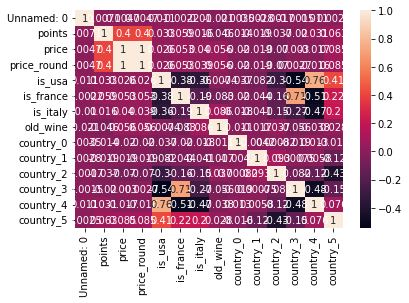

In [25]:
sns.heatmap(data02.corr(), annot=True)

In [26]:
data02 = data02.drop(['price'], axis=1)

<AxesSubplot:>

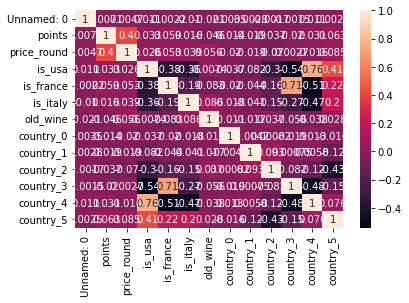

In [27]:
sns.heatmap(data02.corr(), annot=True)

In [28]:
data02 = data02.drop(['country_4'], axis=1)
data02 = data02.drop(['country_3'], axis=1)

<AxesSubplot:>

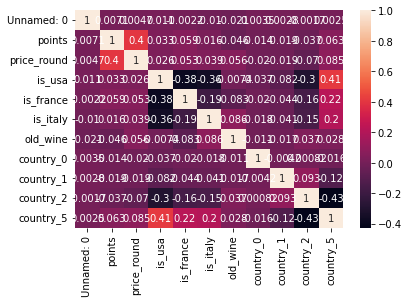

In [29]:
sns.heatmap(data02.corr(), annot=True)